In [1]:
from ase.io import read, write
from ase.io.trajectory import Trajectory
from ase import Atoms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
traj_600=Trajectory('../Data/MLMD/LGPS/600K/md.traj')
traj_700=Trajectory('../Data/MLMD/LGPS/700K/md.traj')
traj_800=Trajectory('../Data/MLMD/LGPS/800K/md.traj')
traj_900=Trajectory('../Data/MLMD/LGPS/900K/md.traj')
traj_1000=Trajectory('../Data/MLMD/LGPS/1000K/md.traj')
traj_1100=Trajectory('../Data/MLMD/LGPS/1100K/md.traj')
traj_1200=Trajectory('../Data/MLMD/LGPS/1200K/md.traj')

In [3]:
temperatures = [600, 700, 800, 900, 1000, 1100, 1200]
trajectories = []

for temp in temperatures:
    traj = Trajectory(f'../Data/MLMD/LGPS/{temp}K/md.traj')
    print(f"Number of trajectories for {temp}K: {len(traj)}")
    trajectories.append(traj)

set_indices = [80000, 80000, 80000, 80000, 80000, 80000, 80000]
average_potential_energies = []
error_plot = []
for i, set in enumerate(set_indices):
    set_energy=[]
    for j in range(len(trajectories[i])-set, len(trajectories[i])):
        energy = trajectories[i][j].get_potential_energy()
        set_energy.append(energy)
        se = np.array(set_energy)
        
    std_calc = np.std(set_energy)
    error_plot.append(std_calc)

    print(se.mean())
    average_potential_energies.append(se.mean())
print(error_plot)

Number of trajectories for 600K: 115035
Number of trajectories for 700K: 115168
Number of trajectories for 800K: 115141
Number of trajectories for 900K: 115000
Number of trajectories for 1000K: 112898
Number of trajectories for 1100K: 100000
Number of trajectories for 1200K: 100000
-211.2521616577058
-210.48748455428867
-209.55830262135962
-208.2637355803221
-207.4132187181776
-204.74398971937367
-203.71916123716142
[0.5083449665622378, 0.6302473261728382, 0.7248633608477141, 0.8826005191303515, 0.9714841940070774, 0.9505800146326028, 1.0882135756610207]


[-211.2521616577058, -210.48748455428867, -209.55830262135962, -208.2637355803221, -207.4132187181776, -204.74398971937367, -203.71916123716142]


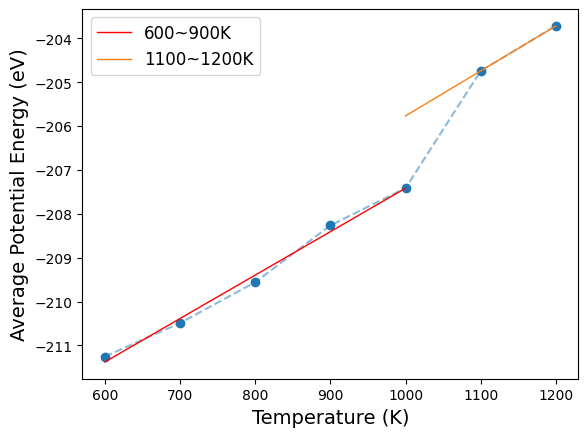

In [4]:
plt.plot(temperatures, average_potential_energies, linestyle='--', alpha=0.5)
plt.scatter(temperatures, average_potential_energies)

fit_line = np.polyfit(temperatures[:4], average_potential_energies[:4], 1)
x_minmax = np.array([min(temperatures[:5]), max(temperatures[:5])])
fit_y = x_minmax * fit_line[0] + fit_line[1]
plt.plot(x_minmax, fit_y, color = 'r', linewidth=1, label='600~900K')

fit_line_m = np.polyfit(temperatures[-2:], average_potential_energies[-2:], 1)
x_minmax_m = np.array([min(temperatures[-3:]), max(temperatures[-3:])])
fit_y_m = x_minmax_m * fit_line_m[0] + fit_line_m[1]
plt.plot(x_minmax_m, fit_y_m, linewidth=1, label='1100~1200K')

est_y = np.array(temperatures[:4]) * fit_line[0] + fit_line[1]
r2 = r2_score(average_potential_energies[:4], est_y)

# plt.errorbar(temperatures, average_potential_energies, yerr=error_plot, color = 'C0', fmt='o', capsize=5)

plt.xlabel('Temperature (K)', size=14)
plt.ylabel('Average Potential Energy (eV)', size=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.legend(fontsize=12)
# plt.savefig('Average_Potential_Energy_all')

print(average_potential_energies)

In [5]:
def get_msd(atom, num_li=20, dim=3, dt=0.001):
    
    init_coord = atom[0].get_positions()[2:2+num_li]
    
    msd_values = []
    for n in range(1, len(atom)):
        fin_coord = atom[n].get_positions()[2:2+num_li]
        msd_avg = np.average(np.sum((fin_coord - init_coord)**2, axis=-1))
        msd_values.append(msd_avg)
    
    D_values = np.average([msd / 2. / dim / (len(atom) * dt) for msd in msd_values])
    D_err = np.std(msd_values) / 2. / dim / (len(atom) * dt)
    
    return msd_values, D_values, D_err

Li_msd_600 = get_msd(traj_600)
Li_msd_700 = get_msd(traj_700)
Li_msd_800 = get_msd(traj_800)
Li_msd_900 = get_msd(traj_900)
Li_msd_1000 = get_msd(traj_1000)
Li_msd_1100 = get_msd(traj_1100)
Li_msd_1200 = get_msd(traj_1200)

[115034, 115167, 115140, 114999, 112897, 99999, 99999]
600K:115034, 700K:115167, 800K:115140, 900K:114999, 1000K:112897, 1100K:99999, 1200K:99999


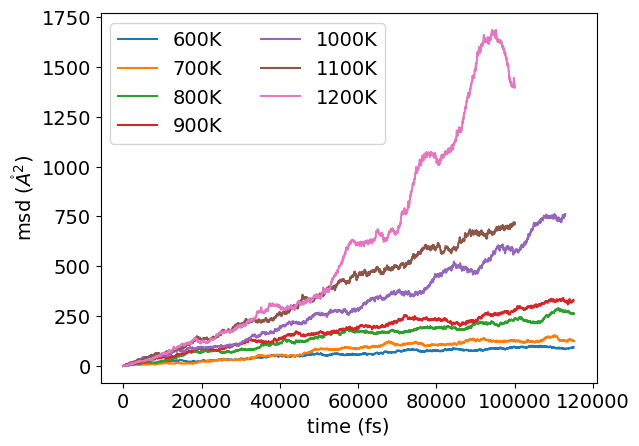

600K:115034, 700K:115167, 800K:115140, 900K:114999, 1000K:112897, 1100K:99999, 1200K:99999


In [6]:
T=[600, 700, 800, 900, 1000, 1100, 1200]
tot_n = []
for temp in T:
    calc_x = locals()['Li_msd_' + str(temp)][0]
    tot_n.append(len(calc_x))
print(tot_n)
out=[]
for i in range(len(T)):
    out.append(f"{T[i]}K:{tot_n[i]}")
output = ', '.join(out)
print(output)

x_600= range(1,len(traj_600))
y_600= Li_msd_600[0]

x_700= range(1,len(traj_700))
y_700= Li_msd_700[0]

x_800= range(1,len(traj_800))
y_800= Li_msd_800[0]

x_900= range(1,len(traj_900))
y_900= Li_msd_900[0]

x_1000= range(1,len(traj_1000))
y_1000= Li_msd_1000[0]

x_1100= range(1,len(traj_1100))
y_1100= Li_msd_1100[0]

x_1200= range(1,len(traj_1200))
y_1200= Li_msd_1200[0]

plt.plot(x_600,y_600, label='600K')
plt.plot(x_700,y_700, label='700K')
plt.plot(x_800,y_800, label='800K')
plt.plot(x_900,y_900, label='900K')
plt.plot(x_1000,y_1000, label='1000K')
plt.plot(x_1100,y_1100, label='1100K')
plt.plot(x_1200,y_1200, label='1200K')

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.xlabel("time (fs)", fontsize=14)
plt.ylabel(r"msd ($\mathring{A}^2$)", fontsize=14)
plt.legend(loc='best', ncol=2, fontsize=14)

plt.show()
print(output)

In [7]:
class D_block_avg:
    def __init__(self, data, num_Li=20, step=500, every=20, dt=0.001, dim=3, temp=0, paper=0.0):
        self.data = data
        self.num_Li = num_Li
        self.step = step
        self.every = every
        self.dt = dt
        self.dim = dim
        self.paper = paper
        self.temp = temp

    def msd_calc(self):
        traj = self.data[::self.every]
        nsamp = len(traj)
        dr = np.array([traj[i + self.step].get_positions()[2:2+self.num_Li] - traj[i].get_positions()[2:2+self.num_Li] for i in range(nsamp - self.step)])
        msd = np.einsum('ijk, ijk->i', dr, dr) / self.num_Li
        return msd

    def plot_D_val(self):
        ps_10 = self.msd_calc()
        D_val = [(i / 2.0 / self.dim / (self.step * self.every * self.dt)) for i in ps_10]
        D_log_avg = np.log(D_val)

        return D_log_avg

    def plot_block_avg(self, d_start=1, d_end=101):
        ps_10 = self.msd_calc()
        D_val = [(i / 2.0 / self.dim / (self.step * self.every * self.dt)) for i in ps_10]

        D_block = []
        D_std_block = []

        for dstep in range(d_start, d_end):
            D_each_block = [np.average(D_val[i:i + dstep]) for i in range(len(D_val) - dstep)]
            D_block.append(np.average(D_each_block))
            D_std_block.append(np.std(D_each_block, ddof=1))

        return D_block, D_std_block

In [8]:
block_avg_calculator_600K = D_block_avg(traj_600, temp=600)
block_avg_calculator_700K = D_block_avg(traj_700, temp=700)
block_avg_calculator_800K = D_block_avg(traj_800, temp=800)
block_avg_calculator_900K = D_block_avg(traj_900, temp=900)
block_avg_calculator_1000K = D_block_avg(traj_1000, temp=1000)
block_avg_calculator_1100K = D_block_avg(traj_1100, temp=1100)
block_avg_calculator_1200K = D_block_avg(traj_1200, temp=1200)

D_block_600K, D_std_block_600K = block_avg_calculator_600K.plot_block_avg()
D_block_700K, D_std_block_700K = block_avg_calculator_700K.plot_block_avg()
D_block_800K, D_std_block_800K = block_avg_calculator_800K.plot_block_avg()
D_block_900K, D_std_block_900K = block_avg_calculator_900K.plot_block_avg()
D_block_1000K, D_std_block_1000K = block_avg_calculator_1000K.plot_block_avg()
D_block_1100K, D_std_block_1100K = block_avg_calculator_1100K.plot_block_avg()
D_block_1200K, D_std_block_1200K = block_avg_calculator_1200K.plot_block_avg()

f_D_log_600K = block_avg_calculator_600K.plot_D_val()
f_D_log_700K = block_avg_calculator_700K.plot_D_val()
f_D_log_800K = block_avg_calculator_800K.plot_D_val()
f_D_log_900K = block_avg_calculator_900K.plot_D_val()

In [9]:
T=[600, 700, 800, 900]

avg_log_D_block_values = []
avg_log_D_block_std = []
for temp in T:
    avg_log_D_block_values.append(np.average(globals()[f'f_D_log_{temp}K']))
    avg_log_D_block_std.append(np.std(globals()[f'f_D_log_{temp}K']))

[1.6666666666666667, 1.4285714285714286, 1.25, 1.1111111111111112]


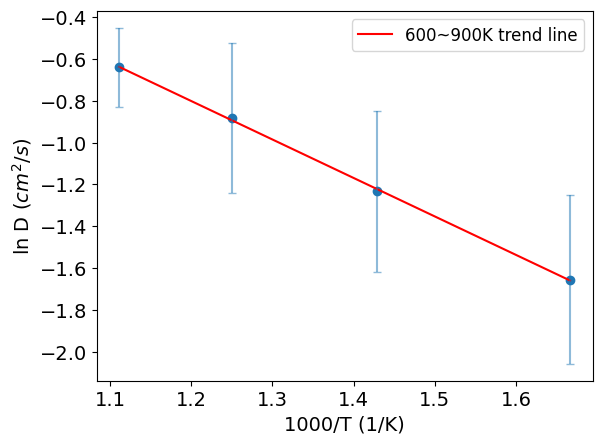

In [10]:
T=[600, 700, 800, 900]

x_val =[]
for temp in T:
    calc_x = 1000/temp
    x_val.append(calc_x)    
print(x_val) 
    
avg_D_block_values_600to900 = avg_log_D_block_values[:4]

fit_line = np.polyfit(x_val[:4], avg_D_block_values_600to900[:4], 1)
x_minmax = np.array([min(x_val[0:]), max(x_val[0:])])
fit_y = x_minmax * fit_line[0] + fit_line[1]
plt.plot(x_minmax, fit_y, color = 'r', label='600~900K trend line')

from sklearn.metrics import r2_score
est_y = np.array(x_val[0:4]) * fit_line[0] + fit_line[1]
r2 = r2_score(avg_D_block_values_600to900[0:4], est_y)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.xlabel("1000/T (1/K)", size=14)
plt.ylabel("ln D" " " r"$(cm^{2}/s)$", size=14)
plt.scatter(x_val, avg_D_block_values_600to900)
plt.errorbar(x_val, avg_D_block_values_600to900, yerr=avg_log_D_block_std, capsize=3, alpha=0.5, linestyle='')
plt.legend(fontsize=12)